Based on https://github.com/amirmgh1375/iranian-license-plate-recognition

In [1]:
!git clone https://github.com/amirmgh1375/iranian-license-plate-recognition

Cloning into 'iranian-license-plate-recognition'...
remote: Enumerating objects: 1120, done.
remote: Counting objects: 100% (1113/1113), done.
remote: Compressing objects: 100% (872/872), done.
remote: Total 1120 (delta 238), reused 1113 (delta 238), pack-reused 7 (from 1)
Receiving objects: 100% (1120/1120), 29.74 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (238/238), done.


## Original glyphs

In [2]:
images_path = "/content/iranian-license-plate-recognition/Dataset/Glyphs/traffic_bold"

In [41]:
import cv2
import numpy as np
import os
images = []
idx = 0
for filename in os.listdir(images_path):
    print(idx, filename)
    img = cv2.imread(os.path.join(images_path,filename))
    if img is not None:
        images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    idx += 1

0 ALEF.png
1 MOVARAB.png
2 0.png
3 2.png
4 GHAF.png
5 KAF.png
6 YE.png
7 ZAD.png
8 KHE.png
9 NON.png
10 VAV.png
11 PE.png
12 GHEIN.png
13 HA.png
14 LAM.png
15 7.png
16 3.png
17 extract_traffic_bold.py
18 8.png
19 MIM.png
20 ZE.png
21 DAL.png
22 SE.png
23 SIN.png
24 4.png
25 6.png
26 EIN.png
27 1.png
28 ZAL.png
29 GAF.png
30 HE.png
31 SAD.png
32 SHIN.png
33 5.png
34 CHE.png
35 ZA.png
36 RE.png
37 TE.png
38 FE.png
39 ZHE.png
40 BE.png
41 TA.png
42 9.png
43 JIM.png


In [34]:
import cv2
import matplotlib.pyplot as plt
from typing import List

def display_images_grid(images: List, rows: int, cols: int, figsize=(8, 8)):
    """
    Display a list of images in a grid using matplotlib.

    Args:
        images (List): List of images loaded using cv2.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        figsize (tuple): Figure size for the display.
    """

    # Create a grid to display the images
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.tight_layout(pad=0.0)

    # Flatten the axes array to easily iterate over it
    axes = axes.ravel()

    # Display each image in the grid
    for idx, img in enumerate(images):
        if idx < len(axes):
            axes[idx].imshow(img)
            axes[idx].axis('off')

    # Hide any remaining empty subplots
    for idx in range(len(images), len(axes)):
        axes[idx].axis('off')

    plt.show()

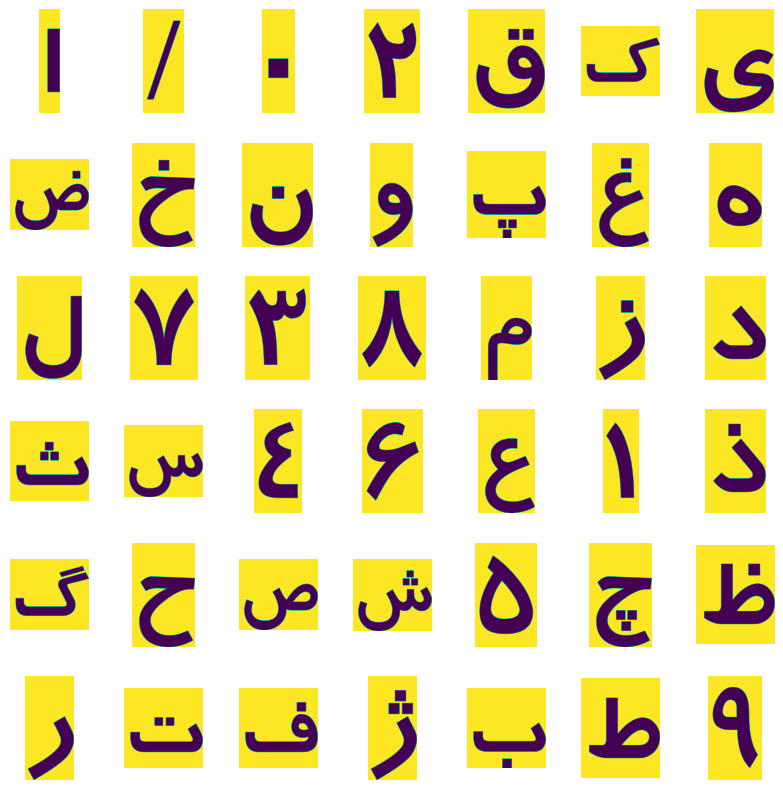

In [35]:
# Example usage:
display_images_grid(images, rows=6, cols=7)


## Crop the glyphs

In [29]:
cropped_images = []
for image in images:
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(np.vstack(contours))
    cropped_image = image[y:y+h, x:x+w]
    cropped_images.append(cropped_image)

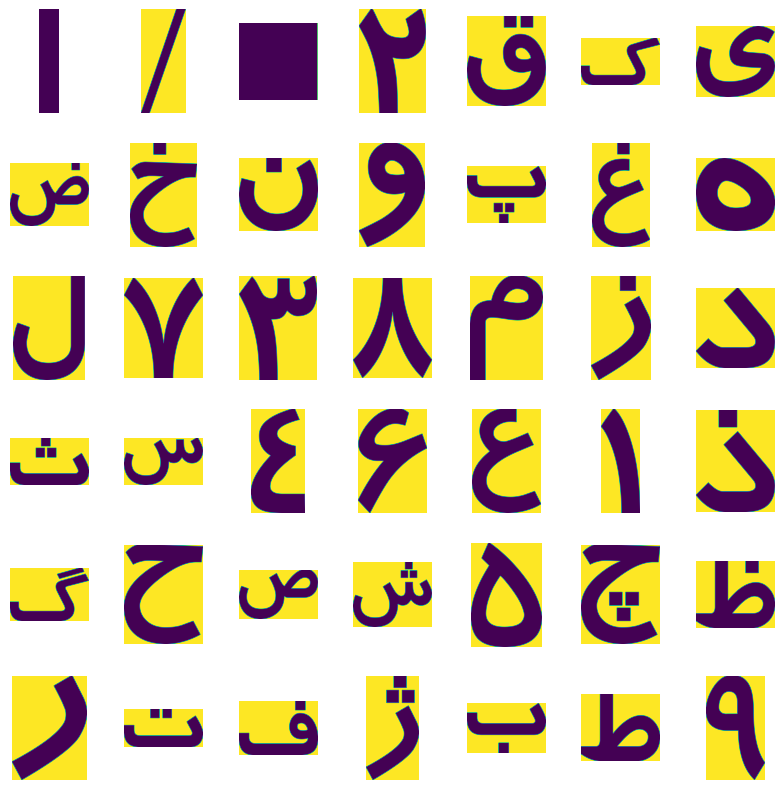

In [36]:
display_images_grid(cropped_images, rows=6, cols=7)

## Resize to 26x26

In [51]:
resized_images = []
for image in cropped_images:
  resized_image = cv2.resize(image, (26, 26))
  resized_image = np.pad(resized_image, (2,2), 'constant', constant_values=255)
  resized_images.append(resized_image)

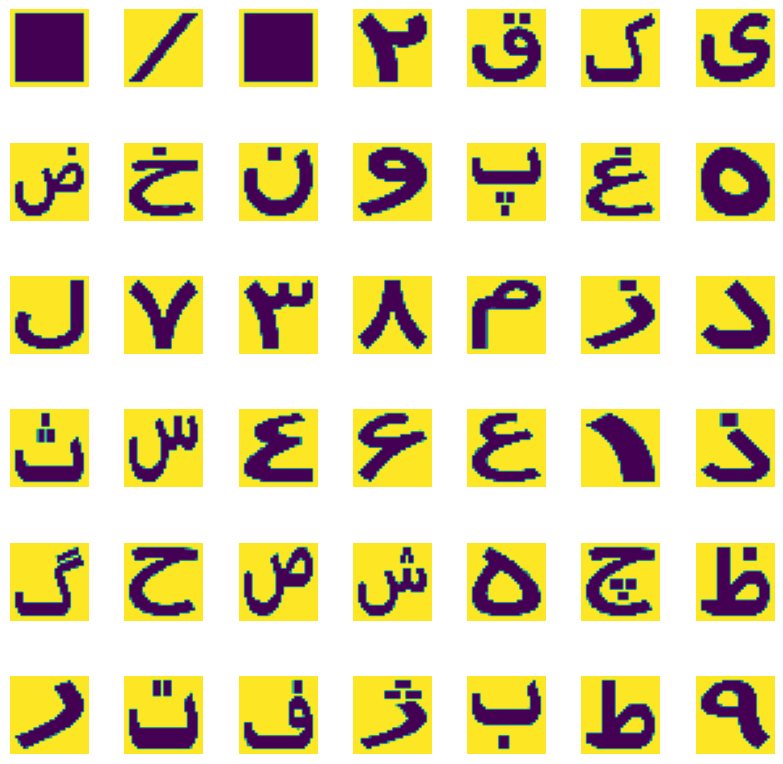

In [52]:
display_images_grid(resized_images, rows=6, cols=7)

## Seperate digits from letters

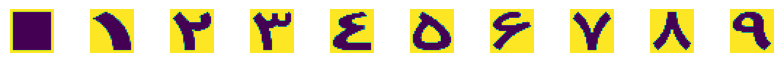

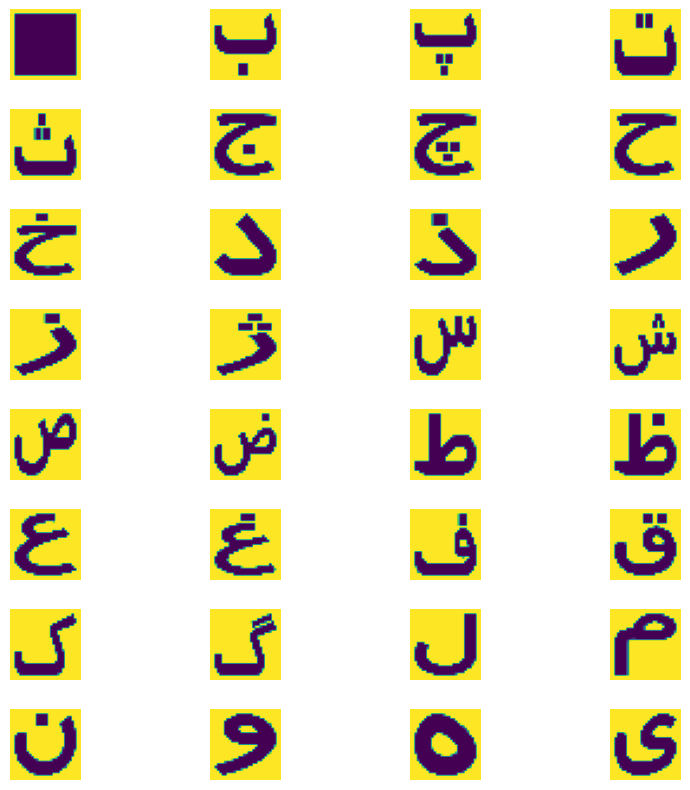

In [53]:
digit_images = [resized_images[i] for i in [2, 26, 3, 16, 23, 32, 24, 15, 17, 41]]
letter_images = [resized_images[i] for i in [0, 39, 11, 36, 21, 42, 33, 29, 8, 20, 27, 35, 19, 38, 22, 31, 30, 7, 40, 34, 25, 12, 37, 4,  5, 28, 14, 18, 9, 10, 13, 6, 1]]

display_images_grid(digit_images, rows=1, cols=len(digit_images))
print()
display_images_grid(letter_images, rows=8, cols=len(letter_images)//8)

## Save the images to disk

In [59]:
# save to disk
names = ["digit_0", "digit_1", "digit_2", "digit_3", "digit_4", "digit_5", "digit_6", "digit_7", "digit_8", "digit_9"]
for i, image in enumerate(digit_images):
  cv2.imwrite(f"digits/{names[i]}.png", image)


# save to disk
names = ["ALEF",
         "BE",
         "PE",
         "TE",
         "SE",
         "JIM",
         "CHE",
         "HE",
         "KHE",
         "DAL",
         "ZAL",
         "RE",
         "ZE",
         "ZHE",
         "SIN",
         "SHIN",
         "SAD",
         "ZAD",
         "TA",
         "ZA",
         "EIN",
         "GHEIN",
         "FE",
         "GHAF",
         "KAF",
         "GHAF",
         "LAM",
         "MIM",
         "NON",
         "VAV",
         "HA",
         "YE",
         "MOVARRAB"]
for i, image in enumerate(letter_images):
  cv2.imwrite(f"letters/{names[i]}.png", image)

# upload the dataset to roboflow

In [61]:
!pip install roboflow

  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [62]:
from roboflow import Roboflow
from google.colab import userdata

api_key = userdata.get('RF_TOKEN')
rf = Roboflow(api_key=api_key)
workspace = rf.workspace("ghd-eqdoe")   # Replace with your workspace ID
project = workspace.project("persian_digits_and_letters")  # Replace with your project ID

# Upload images from a directory
upload_response = project.upload("digits")

loading Roboflow workspace...
loading Roboflow project...
[ digits/ALEF.png ] was uploaded succesfully.
[ digits/digit_5.png ] was uploaded succesfully.
[ digits/digit_2.png ] was uploaded succesfully.
[ digits/KHE.png ] was uploaded succesfully.
[ digits/PE.png ] was uploaded succesfully.
[ digits/digit_0.png ] was uploaded succesfully.
[ digits/DAL.png ] was uploaded succesfully.
[ digits/SE.png ] was uploaded succesfully.
[ digits/digit_9.png ] was uploaded succesfully.
[ digits/digit_3.png ] was uploaded succesfully.
[ digits/digit_6.png ] was uploaded succesfully.
[ digits/HE.png ] was uploaded succesfully.
[ digits/digit_4.png ] was uploaded succesfully.
[ digits/CHE.png ] was uploaded succesfully.
[ digits/digit_8.png ] was uploaded succesfully.
[ digits/TE.png ] was uploaded succesfully.
[ digits/digit_7.png ] was uploaded succesfully.
[ digits/digit_1.png ] was uploaded succesfully.
[ digits/BE.png ] was uploaded succesfully.
[ digits/JIM.png ] was uploaded succesfully.


In [63]:
upload_response = project.upload("letters")

[ letters/ALEF.png ] was uploaded succesfully.
[ letters/GHAF.png ] was uploaded succesfully.
[ letters/KAF.png ] was uploaded succesfully.
[ letters/YE.png ] was uploaded succesfully.
[ letters/ZAD.png ] was uploaded succesfully.
[ letters/KHE.png ] was uploaded succesfully.
[ letters/NON.png ] was uploaded succesfully.
[ letters/VAV.png ] was uploaded succesfully.
[ letters/PE.png ] was uploaded succesfully.
[ letters/GHEIN.png ] was uploaded succesfully.
[ letters/HA.png ] was uploaded succesfully.
[ letters/LAM.png ] was uploaded succesfully.
[ letters/MIM.png ] was uploaded succesfully.
[ letters/ZE.png ] was uploaded succesfully.
[ letters/DAL.png ] was uploaded succesfully.
[ letters/SE.png ] was uploaded succesfully.
[ letters/SIN.png ] was uploaded succesfully.
[ letters/EIN.png ] was uploaded succesfully.
[ letters/MOVARRAB.png ] was uploaded succesfully.
[ letters/ZAL.png ] was uploaded succesfully.
[ letters/HE.png ] was uploaded succesfully.
[ letters/SAD.png ] was uploade